<a href="https://colab.research.google.com/github/aln21-ua/TFM-PINNs/blob/main/Implementacion/Ecuacion%20Korteweg-De%20Vries/0_Solucion_analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
# Cálculo numérico
import numpy as np

# Representación y animación
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Visualización de la animación en Colab
from IPython.display import HTML

# Guardar archivos en drive
mountdrive = True
if mountdrive==True:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


# 1- Condiciones de la simulación

## Parámetros del sistema

Dada la PDE:

$$\frac{\partial u}{\partial t}-6 u \frac{\partial u}{\partial x}+\frac{\partial^3 u}{\partial x^3}=0$$

## Parámetros de cálculo
Con una longitud de celda $L$ y un tiempo máximo de simulación $T$.

In [ ]:
# Longitud del espacio de simulacion
L = 20.0

# Tiempo máximo de simulación
T = 2.0

# Discretización espacial y temporal
Nx = 51  # Número de puntos espaciales
Nt = 61  # Número de puntos temporales
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# 2- Resolución: solución analítica

Se propone la siguiente solución analítica:

$$u(x, t)=-2 \frac{\partial^2}{\partial x^2} \ln \left(1+B_1 e^{\theta_1}+B_2 e^{\theta_2}+A B_1 B_2 e^{\theta_1+\theta_2}\right)$$

Donde:
$\theta_1=a_1 (x - x_c) -a_1^3(t-t_c)$, $\quad\theta_2=a_2 (x - x_c)-a_2^3(t-t_c)$, $\quad A=\left(\frac{a_1-a_2}{a_1+a_2}\right)^2$;

$a_1$, $a_2$, $B_1$, $B_2$ son constantes arbitrarias y ($x_c$, $t_c$) es el punto espaciotemporal en que ambos solitones se cruzan.

In [ ]:
# Constantes de la solucion
B1 = 10
B2 = 15
a1 = 2.5
a2 = 1.5

def u_analitica(x, t, B1, B2, a1, a2):
    # Definir theta_1 y theta_2
    theta_1 = a1 * x - a1**3 * t
    theta_2 = a2 * x - a2**3 * t

    # Calcular A
    A = ((a1 - a2) / (a1 + a2))**2

    # Definir la función F(x, t)
    F = 1 + B1 * np.exp(theta_1) + B2 * np.exp(theta_2) + A * B1 * B2 * np.exp(theta_1 + theta_2)

    # Calcular las primeras derivadas de F respecto a x
    dF_dx = B1 * a1 * np.exp(theta_1) + B2 * a2 * np.exp(theta_2) + A * B1 * B2 * (a1 + a2) * np.exp(theta_1 + theta_2)

    # Calcular las segundas derivadas de F respecto a x
    d2F_dx2 = B1 * a1**2 * np.exp(theta_1) + B2 * a2**2 * np.exp(theta_2) + A * B1 * B2 * (a1 + a2)**2 * np.exp(theta_1 + theta_2)

    # Calcular la segunda derivada de ln(F) respecto a x
    d2_lnF_dx2 = (d2F_dx2 / F) - (dF_dx / F)**2

    # Calcular w(x, t)
    w_xt = -2 * d2_lnF_dx2

    return w_xt


Que cumple lo siguiente:

## Condiciones iniciales
$
u(x, t=0)=-2 \frac{\partial^2}{\partial x^2} \ln F(x,t=0)
$
con
$
F(x,0) = 1+B_1 e^{\theta_1}+B_2 e^{\theta_2}+A B_1 B_2 e^{\theta_1+\theta_2}
$

donde
$
\theta_1=a_1 (x - x_c) -a_1^3(0-t_c),
$,
$
\quad\theta_2=a_2 (x - x_c)-a_2^3(0-t_c),
$,
$
\quad A=\left(\frac{a_1-a_2}{a_1+a_2}\right)^2
$

## Condiciones de frontera
NO SE IMPONEN

# 3- Cálculo de $u(x,t)$ y guardado de datos

In [ ]:
# Cálculo de todos los valores en paralelo
x_, t_ = np.meshgrid(x, t)
u_tx = u_analitica(x_-10, t_-1, B1, B2, a1, a2)
# tiempo i, posición j: u_tx[i,j]

Guardar solución para otras implementaciones.

In [ ]:
if mountdrive == True:
  TFM_route = "/content/drive/MyDrive/TFM/Implementacion/"
  simulation_name = "Ecuacion Korteweg-De Vries/"
  np.save(TFM_route+simulation_name+"Matrices/u_tx_real.npy", u_tx)
else:
  np.save("u_tx_real.npy", u_tx)

# 4- Visualizaciones

In [ ]:
if mountdrive == True:
  TFM_route = "/content/drive/MyDrive/TFM/Implementacion/"
  simulation_name = "Ecuacion Korteweg-De Vries/"
  u_tx = np.load(TFM_route+simulation_name+"Matrices/u_tx_real.npy")
else:
  u_tx = np.load("u_tx_real.npy")

## Animación

In [ ]:
# Función para ctualizar animación
def actualizar(frame):
    line.set_ydata(u_tx[frame])
    tiempo_text.set_text(f't: {t[frame]:.2f}')
    return line, tiempo_text

In [ ]:
# Crear figura
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Korteweg-De Vries: Analítica')

# Imagen inicial
line, = ax.plot(x, u_tx[0])
tiempo_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Actualizar
ani = animation.FuncAnimation(fig, actualizar, frames=Nt, interval=50, blit=True)

# Mostrar la animación en Google Colab
plt.close("all")
HTML(ani.to_jshtml())

## Mapa de calor

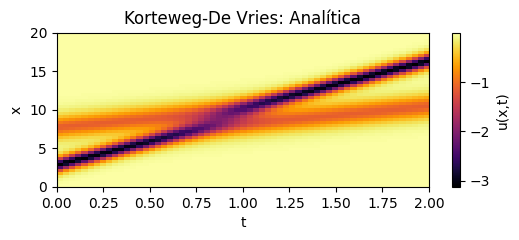

In [ ]:
plt.figure(figsize=(6, 2))
plt.imshow(u_tx[:,::-1].T, extent=[np.min(t), np.max(t), np.min(x), np.max(x)], aspect='auto', interpolation='nearest', cmap = "inferno")
cbar = plt.colorbar(label='u(x,t)')
plt.xlabel('t')
plt.ylabel('x')
plt.ylim([0,L])
plt.title('Korteweg-De Vries: Analítica')
plt.show()